<a href="https://colab.research.google.com/github/pronsSec/HashesandHydras/blob/main/hashesandhydras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

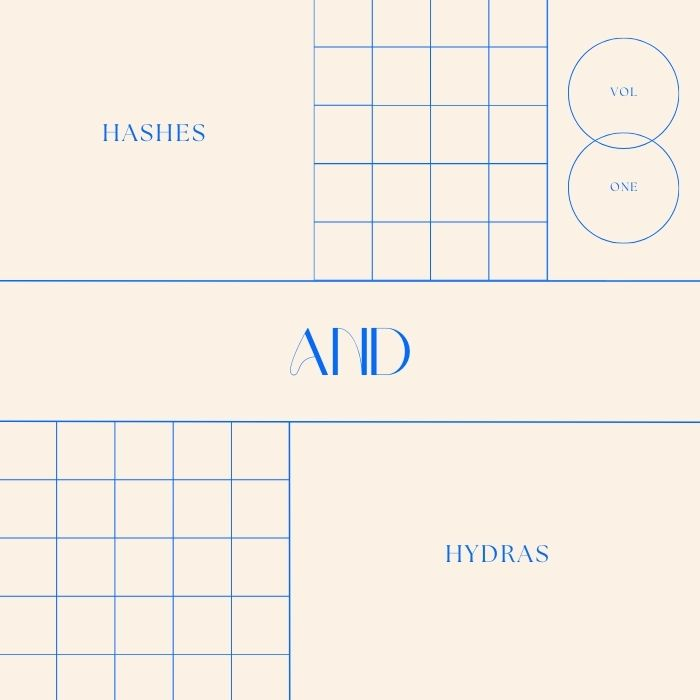





---
---
---

#It is not super hard... but for now you do need the hashes. If you have hashes you can upload them below and then interact within the shell per usual. You can also upload your own wordlists!

---

If you have something like a password locked .zip you can also import them and bruteforce from there. 

Also ... your stuff is yours on here. But, do make sure you are following compliance standards for data transfer if your target org has rules. 

---

# Coming Soon:
Expanded wordlists

zip2john

Export with formatting

---
---
---

#Instructions:

1. Press the play button in the top left of the first cell below this. Upload your hashes or zip and wordlists that way. 

2. Move to the next cell down. Choose your setup with the radio checkboxes and press play. This will take a bit of time, roughly 5 mins. 

3. Press play beside the cell that pops your shell. 

4. Hangout and chillaxinate

TIP!!!
It is sometimes wise to let the files upload and move on to step 2, but you cannot proceed past step 2 until hashes are uploaded.

---
---
---

In [ ]:
#@title Upload your hashes and other things here

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

---


In [ ]:
#@title What tools would you like to use? { form-width: "100%", display-mode: "form" }
from IPython.display import clear_output
import os







#Choose what you want to install
hashcat =  False #@param {type:'boolean'}
john_the_ripper = True #@param {type:'boolean'}
hydra = False #@param {type:'boolean'}

#@markdown Which shell ? (only one, or none)

#Useful for big hashes. but you'll don't see your input (surely a Google Colab protection). Stable.
ssh =  False #@param {type:'boolean'} 

#Useful for little hashes, but not for long hours, since you'll see the output only when it finish. Not interactive, but stable.
python_shell = False #@param {type:'boolean'} 

#It uses ngrok. Stable and interactive, but take a little time to setup
bash_shell = True #@param {type:'boolean'} 

#Wordlists (see weakpass.com to download them)
wordlists_dir = "wordlists"

#@markdown Now choose your wordlist. Keep in mind that hashesorg is massive at 12Gb.
#small and fast wordlist of common passwords
rockyou = True #@param {type:'boolean'} 

#Very heavy (12.79 Gb) but has a good rate, if you're determinated
hashesorg2019 = False #@param {type:'boolean'} 



if (python_shell and bash_shell) or (bash_shell and ssh) or (ssh and python_shell) :
    print("Please choose only one shell and press play again!!")
    exit()




#Brinding in wordlists depending upon choices


os.system("wordlists_dir={}".format(wordlists_dir))
!mkdir ./$wordlists_dir
if rockyou:
    !printf "[+] Downloading the Rockyou wordlist...\n"
    !cd $wordlists_dir && wget https://download.weakpass.com/wordlists/90/rockyou.txt.gz
    !printf "[+] Wordlist downloaded !\n[+] Extraction...\n"
    !cd $wordlists_dir && gunzip rockyou.txt.gz
    !printf "[+] Finished !\n[+] Location : $(pwd)/$wordlists_dir/$(ls wordlists | grep rockyou)"

if hashesorg2019:
    !printf "[+] Downloading the HashesOrg2019 wordlist...\n"
    !cd $wordlists_dir && wget https://download.weakpass.com/wordlists/1851/hashesorg2019.gz
    !printf "[+] Wordlist downloaded !\n[+] Extraction...\n"
    !cd $wordlists_dir && gunzip hashesorg2019.gz
    !printf "[+] Finished !\n[+] Location : $(pwd)/$wordlists_dir/$(ls wordlists | grep hashesorg2019)"

clear_output()

#Install of hashcat
if hashcat:
    print("Installation of hashcat...")
    !apt install cmake build-essential -y
    !apt install checkinstall git -y
    !git clone https://github.com/hashcat/hashcat.git && cd hashcat && make -j 8 && make install

#Install of john_the_ripper
if john_the_ripper:
    print("Installation of john_the_ripper...")
    !apt-get install john -y


#Install of hydra
if hydra:
    print("Installation of hydra...")
    !apt install cmake build-essential -y
    !apt install checkinstall git -y
    !git clone https://github.com/vanhauser-thc/thc-hydra.git && cd thc-hydra && ./configure && make && make install    

clear_output()





---
---
---
---



# Now you want to go ahead and pop your shell!






---


...or not...




---


I don't...honestly you don't have to. 




---



---



---



---



---



In [ ]:
#@title This section will open your chosen shell. If no shell was chosen please just press play and continue on. { display-mode: "form" }
from termcolor import colored
import os

if ssh:
    print("Setting up SSH...")
    !pip install git+https://github.com/demotomohiro/remocolab.git
    import remocolab
    remocolab.setupSSHD()

elif python_shell:
    os.system("touch /tmp/cmd && touch /tmp/status")

    template_cmd = "echo -n $(whoami)[$(hostname)[$(pwd) &> /tmp/status"
    os.system("bash -c '{}'".format(template_cmd))
    output = {"cmd": "", "status": ""}
    with open('/tmp/cmd', 'r') as f:
        output["cmd"] = f.read()
    with open('/tmp/status', 'r') as f:
        output["status"] = f.read()
    prefixes = output["status"].split("[")
    path = prefixes[2].replace('\n', '')
    prefix = colored(prefixes[0] + "@" + prefixes[1], "red") + ":" + colored(path, "cyan") + "$ "
    print("")

    while 1:
        print(prefix, end='')
        cmd = input()
        template_cmd = "cd {} && ".format(path) + "" + cmd + " &> /tmp/cmd ; echo $(whoami)[$(hostname)[$(pwd) &> /tmp/status"
        os.system("bash -c '{}'".format(template_cmd))
        output = {"cmd": "", "status": ""}
        with open('/tmp/cmd', 'r') as f:
            output["cmd"] = f.read()
        with open('/tmp/status', 'r') as f:
            output["status"] = f.read()
        prefixes = output["status"].split("[")
        path = prefixes[2].replace('\n', '')
        prefix = colored(prefixes[0] + "@" + prefixes[1], "red") + ":" + colored(path, "cyan") + "$ "
        print(output["cmd"])

elif bash_shell:
    !/bin/bash

else:
    print(' Your environment is ready !\nWant to run it right here instead of in a shell ?')
    print('Just use the code block below and start your commands with a "!"')
    
    print('|\n|\n|\nV')



---



---



---



---



---



# Assuming you do not need a shell feel free to run your commands below in any code box you want to generate. Place '!' before your terminal commands in order to have them execute. 


In [ ]:
# Examples:

# !hashcat -h
# !john hash_sample.txt
# You know the drill